In [56]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [46]:
benign = glob.glob('Dataset2/FNA/benign/**/*.png', recursive = True)
malignant = glob.glob('Dataset2/FNA/malignant/**/*.png', recursive = True)
test = glob.glob('Dataset2/test/**/*.png', recursive = True)                  

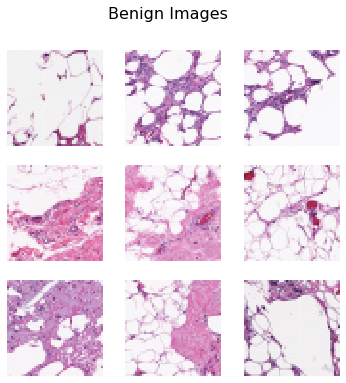

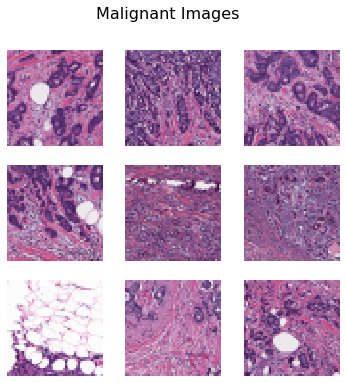

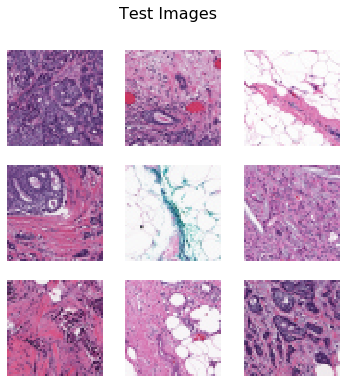

In [47]:
# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(6, 6))
    plt.suptitle(title, fontsize=16)
    for i, path in enumerate(image_paths[:9]):  # Displaying the first 9 images
        plt.subplot(3, 3, i + 1)
        img = mpimg.imread(path)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display images for each category
display_images(benign, title='Benign Images')
display_images(malignant, title='Malignant Images')
display_images(test, title='Test Images')

In [48]:
print(f'Number of Benign Images: {len(benign)}')
print(f'Number of Malignant Images: {len(malignant)}')
print(f'Number of Test Images: {len(test)}')
total = len(benign) + len(malignant)
print(' Total number of Images : {}' .format(total))

Number of Benign Images: 1074
Number of Malignant Images: 650
Number of Test Images: 14
 Total number of Images : 1724


In [49]:
def load_and_preprocess_images(image_paths, label):
    images = []
    labels = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (224, 224))  # Resize to a common size
        images.append(img)
        labels.append(label)
    return images, labels
# Load and preprocess images for each category
benign_images, benign_labels = load_and_preprocess_images(benign, label='benign')
malignant_images, malignant_labels = load_and_preprocess_images(malignant, label='malignant')

# Concatenate the arrays for X and y
X = np.concatenate([benign_images, malignant_images], axis=0)
y = np.concatenate([benign_labels, malignant_labels], axis=0)
y

array(['benign', 'benign', 'benign', ..., 'malignant', 'malignant',
       'malignant'], dtype='<U9')

In [50]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Converting  the labels to categorical format
y_categorical = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape (categorical):", y_train.shape)
print("y_test shape (categorical):", y_test.shape)

X_train shape: (1379, 224, 224, 3)
X_test shape: (345, 224, 224, 3)
y_train shape (categorical): (1379, 2)
y_test shape (categorical): (345, 2)


In [51]:
# Loading  and preprocessing  images of test data
test_images, _ = load_and_preprocess_images(test, label='test')


model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Two output classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating  the model on the test data
test_predictions = model.predict(np.array(test_images))

# Print the predictions
print(test_predictions)




Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - ETA: 0s - loss: 14668.1270 - accuracy: 0.5703WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0caba92710> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [52]:
# Converting  predictions to labels
predicted_labels = np.argmax(test_predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# Printing  the predicted classes 
print("Predicted classes for test images:")
print(predicted_classes)


Predicted classes for test images:
['malignant' 'malignant' 'benign' 'malignant' 'benign' 'malignant'
 'malignant' 'benign' 'malignant' 'benign' 'malignant' 'benign'
 'malignant' 'malignant']


In [53]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Printing evaluation metrics
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

11/11 [==============================] - 0s 15ms/step - loss: 797.7014 - accuracy: 0.8667
Test accuracy: 0.8666666746139526
11/11 [==============================] - 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       222
           1       0.82      0.80      0.81       123

    accuracy                           0.87       345
   macro avg       0.86      0.85      0.85       345
weighted avg       0.87      0.87      0.87       345



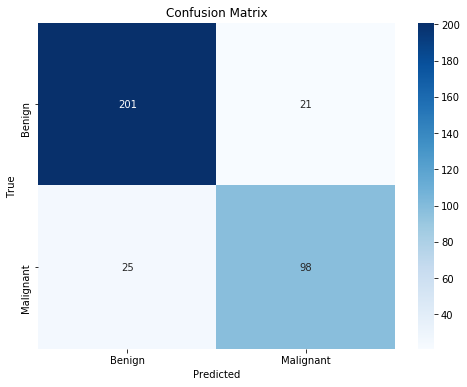

In [57]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()